



The data assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Global Historical Climatology Network daily (GHCNd)](https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-daily) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe - it's a wonderfully large dataset to play with! In particular, you will be asked to use data from the Ann Arbor Michigan location (my home!). and this is stored in the file: `assets/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`

Each row in this datafile corresponds to a single observation from a weather station, and has the following variables:
* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)



In [227]:
#  I'll be using the folium package to render the data into a map in Jupyter.

import folium
import pandas as pd

# get the location information for this dataset
df = pd.read_csv('assets/BinSize_d400.csv')
station_locations_by_hash = df[df['hash'] == 'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89']

# get longitude and lattitude to plot
lons = station_locations_by_hash['LONGITUDE'].tolist()
lats = station_locations_by_hash['LATITUDE'].tolist()

# plot on a beautiful folium map
my_map = folium.Map(location = [lats[0], lons[0]], height = 500,  zoom_start = 9)
for lat, lon in zip(lats, lons):
    folium.Marker([lat, lon]).add_to(my_map)

# render map in Jupyter
display(my_map)

## Step 1
Load the dataset and transform the data into Celsius then extract all of the rows which have minimum or maximum temperatures.



In [228]:
import pandas as pd
df = pd.read_csv('assets/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [229]:
df

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106
...,...,...,...,...
165080,USC00205822,2015-06-09,TMAX,256
165081,USC00205822,2009-10-06,TMAX,167
165082,USC00205050,2014-07-14,TMAX,283
165083,USC00200230,2006-11-29,TMIN,117


In [230]:
# In this code cell, transform the Data_Value column
df['Data_Value'] = df['Data_Value']/10
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,2.2
1,USC00208972,2009-04-29,TMIN,5.6
2,USC00200032,2008-05-26,TMAX,27.8
3,USC00205563,2005-11-11,TMAX,13.9
4,USC00200230,2014-02-27,TMAX,-10.6


In [231]:
# df[['Year', 'Month-Day']] = df['Date'].str.split('-', 1, expand=True)
df['Date'] = pd.to_datetime(df['Date'])
df

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,2.2
1,USC00208972,2009-04-29,TMIN,5.6
2,USC00200032,2008-05-26,TMAX,27.8
3,USC00205563,2005-11-11,TMAX,13.9
4,USC00200230,2014-02-27,TMAX,-10.6
...,...,...,...,...
165080,USC00205822,2015-06-09,TMAX,25.6
165081,USC00205822,2009-10-06,TMAX,16.7
165082,USC00205050,2014-07-14,TMAX,28.3
165083,USC00200230,2006-11-29,TMIN,11.7


In [232]:
df.sort_values(by=['Date'], inplace=True)
df

,ID,Date,Element,Data_Value
60995,USW00004848,2005-01-01,TMIN,0.0
17153,USC00207320,2005-01-01,TMAX,15.0
17155,USC00207320,2005-01-01,TMIN,-1.1
10079,USW00014833,2005-01-01,TMIN,-4.4
10073,USW00014833,2005-01-01,TMAX,3.3
...,...,...,...,...
45691,USC00200032,2015-12-31,TMAX,1.1
10573,USC00205050,2015-12-31,TMIN,-1.7
21088,USC00208202,2015-12-31,TMAX,0.0
10253,USC00201250,2015-12-31,TMIN,-0.6


In [233]:
df.head(50)

,ID,Date,Element,Data_Value
60995,USW00004848,2005-01-01,TMIN,0.0
17153,USC00207320,2005-01-01,TMAX,15.0
17155,USC00207320,2005-01-01,TMIN,-1.1
10079,USW00014833,2005-01-01,TMIN,-4.4
10073,USW00014833,2005-01-01,TMAX,3.3
2812,USC00203712,2005-01-01,TMIN,-5.0
60994,USW00004848,2005-01-01,TMAX,13.3
39454,USC00205563,2005-01-01,TMAX,2.8
18049,USW00014853,2005-01-01,TMAX,5.6
24805,USW00094889,2005-01-01,TMIN,-5.6


In [237]:
group_max = df.groupby(['Element'])
df_max = group_max.get_group("TMAX")
print("TMAX: \n", df_max)

TMAX: 
                 ID       Date Element  Data_Value
17153  USC00207320 2005-01-01    TMAX        15.0
10073  USW00014833 2005-01-01    TMAX         3.3
60994  USW00004848 2005-01-01    TMAX        13.3
39454  USC00205563 2005-01-01    TMAX         2.8
18049  USW00014853 2005-01-01    TMAX         5.6
...            ...        ...     ...         ...
40650  USC00200228 2015-12-31    TMAX         0.0
32235  USC00207312 2015-12-31    TMAX         0.6
10639  USC00205050 2015-12-31    TMAX         0.0
45691  USC00200032 2015-12-31    TMAX         1.1
21088  USC00208202 2015-12-31    TMAX         0.0

[83063 rows x 4 columns]


In [238]:
group_min = df.groupby(['Element'])
df_min = group_max.get_group("TMIN")
print("TMIN: \n", df_min)

TMIN: 
                 ID       Date Element  Data_Value
60995  USW00004848 2005-01-01    TMIN         0.0
17155  USC00207320 2005-01-01    TMIN        -1.1
10079  USW00014833 2005-01-01    TMIN        -4.4
2812   USC00203712 2005-01-01    TMIN        -5.0
24805  USW00094889 2005-01-01    TMIN        -5.6
...            ...        ...     ...         ...
40653  USC00200228 2015-12-31    TMIN        -1.1
39461  USC00202308 2015-12-31    TMIN        -1.1
10573  USC00205050 2015-12-31    TMIN        -1.7
10253  USC00201250 2015-12-31    TMIN        -0.6
29410  USC00200230 2015-12-31    TMIN        -1.7

[82022 rows x 4 columns]


## Step 2
In order to visualize the data we would plot the min and max data for each day of the year between the years 2005 and 2014 across all weather stations. But we also need to find out when the min or max temperature in 2015 falls below the min or rises above the max for the previous decade.



In [239]:
result_df_min = df_min.groupby('Date')['Data_Value'].min().reset_index()

In [240]:
result_df_min

,Date,Data_Value
0,2005-01-01,-5.6
1,2005-01-02,-5.6
2,2005-01-03,0.0
3,2005-01-04,-3.9
4,2005-01-05,-9.4
...,...,...
4012,2015-12-27,-0.6
4013,2015-12-28,-3.9
4014,2015-12-29,-3.9
4015,2015-12-30,-2.2


In [241]:
result_df_max = df_max.groupby('Date')['Data_Value'].max().reset_index()

In [242]:
result_df_max

,Date,Data_Value
0,2005-01-01,15.6
1,2005-01-02,13.9
2,2005-01-03,13.3
3,2005-01-04,3.9
4,2005-01-05,3.3
...,...,...
4012,2015-12-27,8.3
4013,2015-12-28,6.1
4014,2015-12-29,10.0
4015,2015-12-30,6.7


In [243]:
result_df_max= result_df_max[result_df_max['Date'].dt.strftime('%m-%d') != '02-29']


In [244]:
result_df_max

,Date,Data_Value
0,2005-01-01,15.6
1,2005-01-02,13.9
2,2005-01-03,13.3
3,2005-01-04,3.9
4,2005-01-05,3.3
...,...,...
4012,2015-12-27,8.3
4013,2015-12-28,6.1
4014,2015-12-29,10.0
4015,2015-12-30,6.7


In [245]:
result_df_min= result_df_min[result_df_min['Date'].dt.strftime('%m-%d') != '02-29']


In [246]:
result_df_min

,Date,Data_Value
0,2005-01-01,-5.6
1,2005-01-02,-5.6
2,2005-01-03,0.0
3,2005-01-04,-3.9
4,2005-01-05,-9.4
...,...,...
4012,2015-12-27,-0.6
4013,2015-12-28,-3.9
4014,2015-12-29,-3.9
4015,2015-12-30,-2.2


In [247]:
df_scatter_max = result_df_max[result_df_max['Date'].dt.year == 2015]
print(df_scatter_max)
# Drop rows for the year 2015 from the original DataFrame
result_df_max = result_df_max[result_df_max['Date'].dt.year != 2015]
print(result_df_max)

           Date  Data_Value
3652 2015-01-01         1.1
3653 2015-01-02         3.9
3654 2015-01-03         3.9
3655 2015-01-04         4.4
3656 2015-01-05         2.8
...         ...         ...
4012 2015-12-27         8.3
4013 2015-12-28         6.1
4014 2015-12-29        10.0
4015 2015-12-30         6.7
4016 2015-12-31         1.7

[365 rows x 2 columns]
           Date  Data_Value
0    2005-01-01        15.6
1    2005-01-02        13.9
2    2005-01-03        13.3
3    2005-01-04         3.9
4    2005-01-05         3.3
...         ...         ...
3647 2014-12-27        11.1
3648 2014-12-28        13.3
3649 2014-12-29         8.9
3650 2014-12-30         3.3
3651 2014-12-31        -2.8

[3650 rows x 2 columns]


In [248]:
df_scatter_min = result_df_min[result_df_min['Date'].dt.year == 2015]
print(df_scatter_min)
# Drop rows for the year 2015 from the original DataFrame
result_df_min = result_df_min[result_df_min['Date'].dt.year != 2015]
print(result_df_min)

           Date  Data_Value
3652 2015-01-01       -13.3
3653 2015-01-02       -12.2
3654 2015-01-03        -6.7
3655 2015-01-04        -8.8
3656 2015-01-05       -15.5
...         ...         ...
4012 2015-12-27        -0.6
4013 2015-12-28        -3.9
4014 2015-12-29        -3.9
4015 2015-12-30        -2.2
4016 2015-12-31        -5.6

[365 rows x 2 columns]
           Date  Data_Value
0    2005-01-01        -5.6
1    2005-01-02        -5.6
2    2005-01-03         0.0
3    2005-01-04        -3.9
4    2005-01-05        -9.4
...         ...         ...
3647 2014-12-27        -2.8
3648 2014-12-28        -6.0
3649 2014-12-29       -11.0
3650 2014-12-30       -11.1
3651 2014-12-31       -13.8

[3650 rows x 2 columns]


In [251]:
result_df_max['Date'] = result_df_max['Date'].astype("string")

In [252]:
result_df_min['Date'] = result_df_min['Date'].astype("string")

In [253]:
# Checking the Data Type of a Particular Column
result_df_max['Date'].dtypes


string[python]

In [254]:
result_df_max['Day-Month'] = result_df_max['Date'].apply(lambda x: x[-5:])
result_df_max

,Date,Data_Value,Day-Month
0,2005-01-01,15.6,01-01
1,2005-01-02,13.9,01-02
2,2005-01-03,13.3,01-03
3,2005-01-04,3.9,01-04
4,2005-01-05,3.3,01-05
...,...,...,...
3647,2014-12-27,11.1,12-27
3648,2014-12-28,13.3,12-28
3649,2014-12-29,8.9,12-29
3650,2014-12-30,3.3,12-30


In [255]:
result_df_min['Day-Month'] = result_df_min['Date'].apply(lambda x: x[-5:])
result_df_min

,Date,Data_Value,Day-Month
0,2005-01-01,-5.6,01-01
1,2005-01-02,-5.6,01-02
2,2005-01-03,0.0,01-03
3,2005-01-04,-3.9,01-04
4,2005-01-05,-9.4,01-05
...,...,...,...
3647,2014-12-27,-2.8,12-27
3648,2014-12-28,-6.0,12-28
3649,2014-12-29,-11.0,12-29
3650,2014-12-30,-11.1,12-30


## Step 3
Now that we have grouped the daily max and min temperatures for each day of the years 2005 through 2015, we can separate out the data for 2015. Then  find the max and min of the temperature data for each __day of the year__ for the 2005-2014 data.



In [256]:
import numpy as np
max_plot = result_df_max.groupby('Day-Month').agg({'Data_Value':np.max})
min_plot = result_df_min.groupby('Day-Month').agg({'Data_Value':np.min})

In [257]:
max_plot

,Data_Value
Day-Month,
01-01,15.6
01-02,13.9
01-03,13.3
01-04,10.6
01-05,12.8
...,...
12-27,18.9
12-28,19.4
12-29,12.8


In [258]:
min_plot

,Data_Value
Day-Month,
01-01,-16.0
01-02,-26.7
01-03,-26.7
01-04,-26.1
01-05,-15.0
...,...
12-27,-13.8
12-28,-16.6
12-29,-15.0


In [259]:
# df_scatter_min
df_scatter_min['Date'] = df_scatter_min['Date'].astype("string")
df_scatter_min['Day-Month'] = df_scatter_min['Date'].apply(lambda x: x[-5:])
df_scatter_min

,Date,Data_Value,Day-Month
3652,2015-01-01,-13.3,01-01
3653,2015-01-02,-12.2,01-02
3654,2015-01-03,-6.7,01-03
3655,2015-01-04,-8.8,01-04
3656,2015-01-05,-15.5,01-05
...,...,...,...
4012,2015-12-27,-0.6,12-27
4013,2015-12-28,-3.9,12-28
4014,2015-12-29,-3.9,12-29
4015,2015-12-30,-2.2,12-30


In [260]:
df_scatter_min.drop(columns='Date')

,Data_Value,Day-Month
3652,-13.3,01-01
3653,-12.2,01-02
3654,-6.7,01-03
3655,-8.8,01-04
3656,-15.5,01-05
...,...,...
4012,-0.6,12-27
4013,-3.9,12-28
4014,-3.9,12-29
4015,-2.2,12-30


In [261]:
# df_scatter_max
df_scatter_max['Date'] = df_scatter_max['Date'].astype("string")
df_scatter_max['Day-Month'] = df_scatter_max['Date'].apply(lambda x: x[-5:])
df_scatter_max

,Date,Data_Value,Day-Month
3652,2015-01-01,1.1,01-01
3653,2015-01-02,3.9,01-02
3654,2015-01-03,3.9,01-03
3655,2015-01-04,4.4,01-04
3656,2015-01-05,2.8,01-05
...,...,...,...
4012,2015-12-27,8.3,12-27
4013,2015-12-28,6.1,12-28
4014,2015-12-29,10.0,12-29
4015,2015-12-30,6.7,12-30


In [262]:
df_scatter_max.drop(columns='Date')

,Data_Value,Day-Month
3652,1.1,01-01
3653,3.9,01-02
3654,3.9,01-03
3655,4.4,01-04
3656,2.8,01-05
...,...,...
4012,8.3,12-27
4013,6.1,12-28
4014,10.0,12-29
4015,6.7,12-30


In [263]:
# Assuming df_scatter_max is your DataFrame
df_scatter_max = df_scatter_max[['Day-Month', 'Data_Value']]

# Similarly for df_scatter_min
df_scatter_min = df_scatter_min[['Day-Month', 'Data_Value']]

In [268]:
df_scatter_max

,Day-Month,Data_Value
3652,01-01,1.1
3653,01-02,3.9
3654,01-03,3.9
3655,01-04,4.4
3656,01-05,2.8
...,...,...
4012,12-27,8.3
4013,12-28,6.1
4014,12-29,10.0
4015,12-30,6.7


In [269]:
df_scatter_min

,Day-Month,Data_Value
3652,01-01,-13.3
3653,01-02,-12.2
3654,01-03,-6.7
3655,01-04,-8.8
3656,01-05,-15.5
...,...,...
4012,12-27,-0.6
4013,12-28,-3.9
4014,12-29,-3.9
4015,12-30,-2.2


In [272]:
df_scatter_min = df_scatter_min.reset_index(drop=True)

In [310]:
df_scatter_max = df_scatter_max.reset_index(drop=True)

In [275]:
df_scatter_min = df_scatter_min.set_index('Day-Month')

In [311]:
df_scatter_max = df_scatter_max.set_index('Day-Month')

In [280]:
df_scatter_min

,Data_Value
Day-Month,
01-01,-13.3
01-02,-12.2
01-03,-6.7
01-04,-8.8
01-05,-15.5
...,...
12-27,-0.6
12-28,-3.9
12-29,-3.9


In [297]:
new_df_min = pd.DataFrame()

new_df_min = pd.concat([min_plot, df_scatter_min], axis=1, join='inner')
display(new_df_min)


,Data_Value,Data_Value
Day-Month,,
01-01,-16.0,-13.3
01-02,-26.7,-12.2
01-03,-26.7,-6.7
01-04,-26.1,-8.8
01-05,-15.0,-15.5
...,...,...
12-27,-13.8,-0.6
12-28,-16.6,-3.9
12-29,-15.0,-3.9


In [298]:
new_df_min.columns = ['tempLong','temp2015']
new_df_min

,tempLong,temp2015
Day-Month,,
01-01,-16.0,-13.3
01-02,-26.7,-12.2
01-03,-26.7,-6.7
01-04,-26.1,-8.8
01-05,-15.0,-15.5
...,...,...
12-27,-13.8,-0.6
12-28,-16.6,-3.9
12-29,-15.0,-3.9


In [314]:
new_df_max = pd.DataFrame()
new_df_max = pd.concat([max_plot, df_scatter_max], axis=1, join='inner')
new_df_max.columns = ['tempLong','temp2015']
new_df_max


,tempLong,temp2015
Day-Month,,
01-01,15.6,1.1
01-02,13.9,3.9
01-03,13.3,3.9
01-04,10.6,4.4
01-05,12.8,2.8
...,...,...
12-27,18.9,8.3
12-28,19.4,6.1
12-29,12.8,10.0


In [315]:
new_df_max

,tempLong,temp2015
Day-Month,,
01-01,15.6,1.1
01-02,13.9,3.9
01-03,13.3,3.9
01-04,10.6,4.4
01-05,12.8,2.8
...,...,...
12-27,18.9,8.3
12-28,19.4,6.1
12-29,12.8,10.0


In [366]:
final_scatter_min = new_df_min.copy()
# final_scatter_min['tempLong'] = new_df_min['tempLong'].where(new_df_min['temp2015'] < new_df_min['tempLong'])
final_scatter_min['temp2015'] = new_df_min['temp2015'].where(new_df_min['temp2015'] < new_df_min['tempLong'])

# Display the new DataFrame
print(final_scatter_min)

           tempLong  temp2015
Day-Month                    
01-01         -16.0       NaN
01-02         -26.7       NaN
01-03         -26.7       NaN
01-04         -26.1       NaN
01-05         -15.0     -15.5
...             ...       ...
12-27         -13.8       NaN
12-28         -16.6       NaN
12-29         -15.0       NaN
12-30         -14.4       NaN
12-31         -15.0       NaN

[365 rows x 2 columns]


In [367]:
final_scatter_min

,tempLong,temp2015
Day-Month,,
01-01,-16.0,NaN
01-02,-26.7,NaN
01-03,-26.7,NaN
01-04,-26.1,NaN
01-05,-15.0,-15.5
...,...,...
12-27,-13.8,NaN
12-28,-16.6,NaN
12-29,-15.0,NaN


In [383]:
final_scatter_max = new_df_max.copy()
# final_scatter_min['tempLong'] = new_df_min['tempLong'].where(new_df_min['temp2015'] < new_df_min['tempLong'])
final_scatter_max['temp2015'] = new_df_max['temp2015'].where(new_df_max['temp2015'] > new_df_max['tempLong'])

# Display the new DataFrame
final_scatter_max

,tempLong,temp2015
Day-Month,,
01-01,15.6,NaN
01-02,13.9,NaN
01-03,13.3,NaN
01-04,10.6,NaN
01-05,12.8,NaN
...,...,...
12-27,18.9,NaN
12-28,19.4,NaN
12-29,12.8,NaN


## Step 4
Plotting line graphs of the min and max temperatures for the years 2005 through 2014 and to scatter plot __only__ the daily 2015 temperatures that exceeded those values.

In [378]:
import matplotlib.pyplot as plt
from calendar import month_abbr


# put your plotting code here!

In [380]:
final_scatter_min_reset = final_scatter_min.reset_index()
final_scatter_min_reset

,Day-Month,tempLong,temp2015
0,01-01,-16.0,NaN
1,01-02,-26.7,NaN
2,01-03,-26.7,NaN
3,01-04,-26.1,NaN
4,01-05,-15.0,-15.5
...,...,...,...
360,12-27,-13.8,NaN
361,12-28,-16.6,NaN
362,12-29,-15.0,NaN
363,12-30,-14.4,NaN


In [384]:
final_scatter_max_reset = final_scatter_max.reset_index()
final_scatter_max_reset

,Day-Month,tempLong,temp2015
0,01-01,15.6,NaN
1,01-02,13.9,NaN
2,01-03,13.3,NaN
3,01-04,10.6,NaN
4,01-05,12.8,NaN
...,...,...,...
360,12-27,18.9,NaN
361,12-28,19.4,NaN
362,12-29,12.8,NaN
363,12-30,11.7,NaN


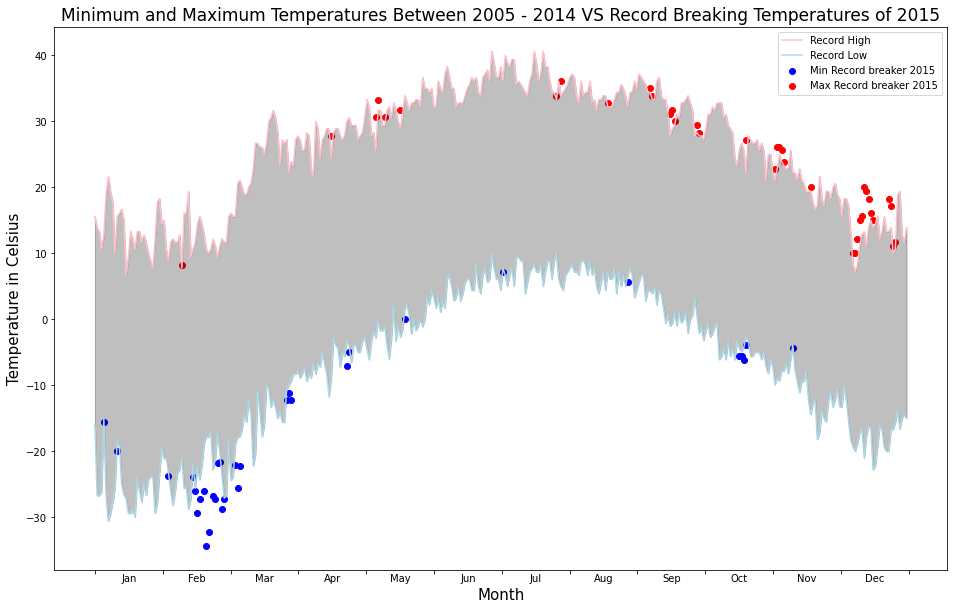

In [406]:
plt.figure(figsize=(16,10))
x = np.arange(0, 365)

labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ticks = np.arange(min(x), max(x)+len(x)/12, len(x)/12)

minor_ticks = ticks + (len(x)/12)/2
minor_ticks = minor_ticks[:len(minor_ticks)-1]

ax = plt.gca()

plt.plot(max_plot.Data_Value, label ='Record High',c='pink')
plt.plot(min_plot.Data_Value, label ='Record Low',c='#ADD8E6')

plt.scatter(final_scatter_min_reset['Day-Month'], final_scatter_min_reset['temp2015'],label ='Min Record breaker 2015', c='blue')
plt.scatter(final_scatter_max_reset['Day-Month'], final_scatter_max_reset['temp2015'],label ='Max Record breaker 2015', c='red')

plt.xlabel('Month', fontsize=15)
plt.ylabel('Temperature in Celsius', fontsize=15)
plt.title('Minimum and Maximum Temperatures Between 2005 - 2014 VS Record Breaking Temperatures of 2015', fontsize=17)

plt.legend(fontsize=10)

plt.fill_between(range(len(max_plot)), 
                       np.array(max_plot.values.reshape(len(min_plot.values),)), 
                       np.array(min_plot.values.reshape(len(min_plot.values),)),  
                       alpha=0.25,color='k')
ax.set_xticks(ticks)
ax.set_xticklabels('')
ax.set_xticks(minor_ticks, minor = True)
ax.set_xticklabels(labels, minor = True)
ax.tick_params(axis='x', which = 'minor', length= 0)


